## New User Report ##
### A look at new users to the portal and which groups they are in


In [1]:
from arcgis.gis import GIS
gis = GIS("home")
%autosave 60

import time
from datetime import timedelta
import datetime as dt
import pandas as pd
import seaborn as sns

/opt/conda/lib/python3.7/site-packages/arcgis/gis/__init__.py:430: UserWarning: You are logged on as Adrian.Hughes@rspb.org.uk_RSPB with an administrator role, proceed with caution.
  self.users.me.username)


Autosaving every 60 seconds


In [2]:
def datetime_of_account_creation(user) -> dt.datetime:
    """Returns a datetime instance of when the user last logged in.
    
    The `user.created` property returns the milliseconds since the 
    epoch, whereas a standard timestamp is the seconds since the epoch. 
    Therefore, we must divide by 1000.
    """
    timestamp_of_account_creation = int(user.created / 1000)
    account_created = dt.datetime.fromtimestamp(timestamp_of_account_creation)
    return account_created

In [3]:
def num_days_since_account_creation(user) -> int:
    """Returns the number of days since account created 

    Subtracting the `account created` and `now` datetime instances will
    yield a timedelta instance. This timedelta instance has a 
    `.days` property, which is what we want to return
    """
    account_created = datetime_of_account_creation(user)
    now = dt.datetime.now()
    return (now - account_created).days

In [4]:
def users_groups(user) -> list:
    """Returns a list of groups that user is a member of"""
    newusergroups = []
    for group in user['groups']:
        
        grp = gis.groups.get(group['id'])
        groupname = grp.title        
        newusergroups.append(groupname)
    
    return newusergroups
    
    

In [5]:
def user_role(user) -> str:
    """Returns role name of user"""
    roleManager = gis.users.roles
    roles = roleManager.all()    

    for role in roles:

        if(user.roleId == role.role_id):

            return str(role.name)

In [6]:
 def check_pro_license(user) -> int:
    """Check if user has Pro license"""
    pro_license = gis.admin.license.get('ArcGIS Pro')
    pro_licences = pro_license.user_entitlement(user.username)
    if (pro_licences):
        return 1
        

In [7]:
for user in gis.users.search(sort_field='created', sort_order='asc', max_users=5):
    roleManager = gis.users.roles
    roles = roleManager.all()    

    for role in roles:

        if(user.roleId == role.role_id):
            print(user.username,user.role,role.name)

Abbie.Thorne@RSPB.ORG.UK_RSPB RSPB User RSPB User
Abby.Mullen_EXT External Basic External Basic
adrian.hughes_Ext External Publisher External Publisher


In [8]:
count = 0
procount = 0
allnewusergroups = []
allnewuserroles = []
for user in gis.users.search(sort_field='created', sort_order='asc', max_users=600):
    
    
    created_time = account_creation = datetime_of_account_creation(user)
    days_since_created = num_days_since_account_creation(user)
    
    if days_since_created < 30:
        #print(user.username + ' ' + str(created_time))
        #print (days_since_created)       
        allnewusergroups.extend(users_groups(user))
        allnewuserroles.append(user_role(user))
        if check_pro_license(user):
        
            procount = procount + 1
            
        count = count + 1
      
print (str(count) + " new users!")
print (str(procount) + " pro users!")

        
        
    

34 new users!
8 pro users!


In [9]:
df = pd.DataFrame(allnewusergroups)
s = df.groupby([0])[0].count()
df2 = pd.DataFrame(dict(group=s.index, count=s.values))
df2

,group,count
0,Beach-Nesting Birds Dashboard Viewers,5
1,Beach-Nesting Birds Data Managers,4
2,Beach-Nesting Birds Users,4
3,Building Condition Survey,1
4,Building Condition Survey Admin,1
5,Cirl Bunting Monitoring,2
6,Cirl Bunting Monitoring Admin,2
7,Dungeness and Lydden Valley RSPB Reserve Group,1
8,Emma's Special group,1
9,Geltsdale and Hadrian's Wall Curlew LIFE Group,5


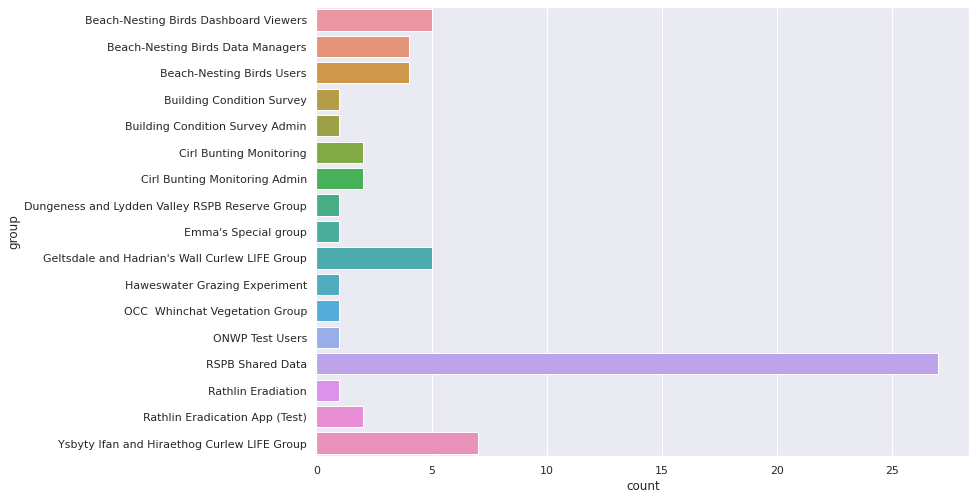

In [10]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
pGroups = sns.barplot(x = 'count', y = 'group', data = df2)

In [11]:
roledf = pd.DataFrame(allnewuserroles)
s = roledf.groupby([0])[0].count()
roledf2 = pd.DataFrame(dict(role=s.index, count=s.values))
roledf2

,role,count
0,RSPB Story Map Editor,1
1,RSPB User,32
2,RSPB Viewer,1


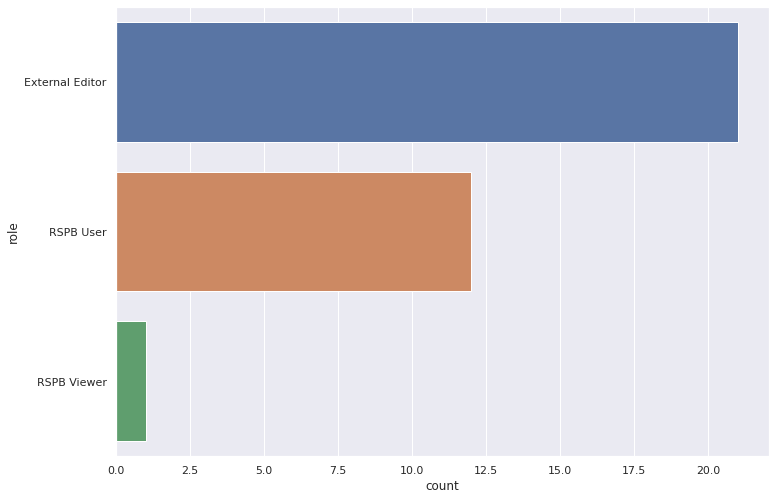

In [18]:
pGroups = sns.barplot(x = 'count', y = 'role', data = roledf2)